# Imports

In [1]:
import seaborn as sns
import os
import numpy as np
import pandas as pd
from datetime import datetime, timedelta
import matplotlib.pylab as plt
import sys
sys.path.append("../")

import warnings
warnings.filterwarnings('ignore')

from kats.consts import TimeSeriesData

# Load data

In [2]:
df = pd.read_csv("e-commerce.csv", index_col=0, parse_dates=["order_purchase_timestamp", "order_approved_at", "order_delivered_carrier_date", "order_estimated_delivery_date"])

In [3]:
df

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,...,seller_state,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,expected_delivery_timedelta,delivery_time,product_volume,same_city,same_state
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,1,87285b34884572647811a353c7ac498a,...,SP,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,1343007000000000,728920000000000,1976.0,False,True
1,128e10d95713541c87cd1a2e48201934,a20e8105f23924cd00833fd87daa0831,delivered,2017-08-15 18:29:31,2017-08-15 20:05:16,2017-08-17 15:28:33,2017-08-18 14:44:43,2017-08-28,1,87285b34884572647811a353c7ac498a,...,SP,3a51803cc0d012c3b5dc8b7528cb05f7,3366,sao paulo,SP,1056629000000000,245712000000000,1976.0,False,True
2,0e7e841ddf8f8f2de2bad69267ecfbcf,26c7ac168e1433912a51b924fbd34d34,delivered,2017-08-02 18:24:47,2017-08-02 18:43:15,2017-08-04 17:35:43,2017-08-07 18:30:01,2017-08-15,1,87285b34884572647811a353c7ac498a,...,SP,ef0996a1a279c26e7ecbd737be23d235,2290,sao paulo,SP,1056913000000000,432314000000000,1976.0,False,True
3,bfc39df4f36c3693ff3b63fcbea9e90a,53904ddbea91e1e92b2b3f1d09a7af86,delivered,2017-10-23 23:26:46,2017-10-25 02:14:11,2017-10-27 16:48:46,2017-11-07 18:04:59,2017-11-13,1,87285b34884572647811a353c7ac498a,...,SP,e781fdcc107d13d865fc7698711cc572,88032,florianopolis,SC,1729994000000000,1276693000000000,1976.0,False,False
4,8736140c61ea584cb4250074756d8f3b,ab8844663ae049fda8baf15fc928f47f,delivered,2017-08-10 13:35:55,2017-08-10 13:50:09,2017-08-11 13:52:35,2017-08-16 19:03:36,2017-08-23,1,b00a32a0b42fd65efb58a5822009f629,...,SP,02c9e0c05a817d4562ec0e8c90f29dba,8577,itaquaquecetuba,SP,1074245000000000,538061000000000,3000.0,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112645,1ab38815794efa43d269d62b98dae815,a0b67404d84a70ef420a7f99ad6b190a,delivered,2018-07-01 10:23:10,2018-07-05 16:17:52,2018-07-04 14:34:00,2018-07-09 15:06:57,2018-07-20,1,31ec3a565e06de4bdf9d2a511b822b4d,...,SP,2077f7ec37df79c62cc24b7b8f30e8c9,8528,ferraz de vasconcelos,SP,1604210000000000,708227000000000,23520.0,False,True
112646,b159d0ce7cd881052da94fa165617b05,e0c3bc5ce0836b975d6b2a8ce7bb0e3e,canceled,2017-03-11 19:51:36,2017-03-11 19:51:36,NaT,NaN,2017-03-30,1,241a1ffc9cf969b27de6e72301020268,...,SC,78a159045124eb7601951b917a42034f,89111,gaspar,SC,1570104000000000,-9223372036854775808,704.0,False,True
112647,735dce2d574afe8eb87e80a3d6229c48,d531d01affc2c55769f6b9ed410d8d3c,delivered,2018-07-24 09:46:27,2018-07-24 11:24:27,2018-07-24 15:14:00,2018-08-02 22:47:35,2018-08-16,1,1d187e8e7a30417fda31e85679d96f0f,...,SP,8cf3c6e1d2c8afaab2eda3fa01d4e3d2,60455,fortaleza,CE,1952013000000000,824468000000000,19200.0,False,False
112648,25d2bfa43663a23586afd12f15b542e7,9d8c06734fde9823ace11a4b5929b5a7,delivered,2018-05-22 21:13:21,2018-05-22 21:35:40,2018-05-24 12:28:00,2018-06-12 23:11:29,2018-06-08,1,6e1c2008dea1929b9b6c27fa01381e90,...,SP,e55e436481078787e32349cee9febf5e,39803,teofilo otoni,MG,1392399000000000,1821488000000000,35301.0,False,False


In [4]:
df2 = df.sort_values(by="order_purchase_timestamp")

In [5]:
df2.columns

Index(['order_id', 'customer_id', 'order_status', 'order_purchase_timestamp',
       'order_approved_at', 'order_delivered_carrier_date',
       'order_delivered_customer_date', 'order_estimated_delivery_date',
       'order_item_id', 'product_id', 'seller_id', 'shipping_limit_date',
       'price', 'freight_value', 'product_category_name',
       'product_name_lenght', 'product_description_lenght',
       'product_photos_qty', 'product_weight_g', 'product_length_cm',
       'product_height_cm', 'product_width_cm', 'seller_zip_code_prefix',
       'seller_city', 'seller_state', 'customer_unique_id',
       'customer_zip_code_prefix', 'customer_city', 'customer_state',
       'expected_delivery_timedelta', 'delivery_time', 'product_volume',
       'same_city', 'same_state'],
      dtype='object')

In [6]:
df2

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,...,seller_state,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,expected_delivery_timedelta,delivery_time,product_volume,same_city,same_state
81394,2e7a8482f6fb09756ca50c10d7bfc047,08c5351a6aca1c1589a38f244edeee9d,shipped,2016-09-04 21:15:19,2016-10-07 13:18:03,2016-10-18 13:14:51,NaN,2016-10-20,1,c1488892604e4ba5cff5b4eb4d595400,...,MG,b7d76e111c89f7ebf14761390f0f7d17,69309,boa vista,RR,3897881000000000,-9223372036854775808,5376.0,False,False
81395,2e7a8482f6fb09756ca50c10d7bfc047,08c5351a6aca1c1589a38f244edeee9d,shipped,2016-09-04 21:15:19,2016-10-07 13:18:03,2016-10-18 13:14:51,NaN,2016-10-20,2,f293394c72c9b5fafd7023301fc21fc2,...,MG,b7d76e111c89f7ebf14761390f0f7d17,69309,boa vista,RR,3897881000000000,-9223372036854775808,5376.0,False,False
91998,e5fa5a7210941f7d56d0208e4e071d35,683c54fc24d40ee9f8a6fc179fd9856c,canceled,2016-09-05 00:15:34,2016-10-07 13:17:15,NaT,NaN,2016-10-28,1,f3c2d01a84c947b078e32bbef0718962,...,PR,4854e9b3feff728c13ee5fc7d1547e92,99025,passo fundo,RS,4578266000000000,-9223372036854775808,1250.0,False,False
103266,bfbd0f9bdef84302105ad712db648a6c,86dc2ffce2dfff336de2f386a786e574,delivered,2016-09-15 12:16:38,2016-09-15 12:16:38,2016-11-07 17:11:53,2016-11-09 07:47:38,2016-10-04,3,5a6b04657a4c5ee34285d1e4619a96b4,...,PR,830d5b7aaa3b6f1e9ad63703bec97d23,14600,sao joaquim da barra,SP,1597402000000000,4735860000000000,4096.0,False,False
103265,bfbd0f9bdef84302105ad712db648a6c,86dc2ffce2dfff336de2f386a786e574,delivered,2016-09-15 12:16:38,2016-09-15 12:16:38,2016-11-07 17:11:53,2016-11-09 07:47:38,2016-10-04,2,5a6b04657a4c5ee34285d1e4619a96b4,...,PR,830d5b7aaa3b6f1e9ad63703bec97d23,14600,sao joaquim da barra,SP,1597402000000000,4735860000000000,4096.0,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78663,0b223d92c27432930dfe407c6aea3041,e60df9449653a95af4549bbfcb18a6eb,delivered,2018-08-29 14:18:23,2018-08-29 14:31:07,2018-08-29 15:29:00,2018-08-30 16:24:55,2018-09-04,1,2b4472df15512a2825ae86fd9ae79335,...,PR,5c58de6fb80e93396e2f35642666b693,80045,curitiba,PR,466897000000000,93992000000000,115248.0,True,True
22516,168626408cb32af0ffaf76711caae1dc,6e353700bc7bcdf6ebc15d6de16d7002,delivered,2018-08-29 14:18:28,2018-08-29 14:30:23,2018-08-29 18:51:00,2018-08-30 16:52:31,2018-09-11,1,bdcf6a834e8faa30dac3886c7a58e92e,...,MG,7febafa06d9d8f232a900a2937f04338,38600,paracatu,MG,1071692000000000,95643000000000,13888.0,False,True
110623,03ef5dedbe7492bdae72eec50764c43f,496630b6740bcca28fce9ba50d8a26ef,delivered,2018-08-29 14:52:00,2018-08-29 15:05:22,2018-08-29 20:01:00,2018-08-30 16:36:59,2018-09-03,1,c7f27c5bef2338541c772b5776403e6a,...,SP,b701bebbdf478f5500348f03aff62121,9541,sao caetano do sul,SP,378480000000000,92699000000000,4788.0,False,True
60570,35a972d7f8436f405b56e36add1a7140,898b7fee99c4e42170ab69ba59be0a8b,delivered,2018-08-29 15:00:37,2018-08-29 15:10:26,2018-08-29 16:57:00,2018-08-30 16:23:36,2018-09-05,1,d04857e7b4b708ee8b8b9921163edba3,...,SP,24ac2b4327e25baf39f2119e4228976a,13483,limeira,SP,550763000000000,91379000000000,1280.0,False,True


# Create time series

In [7]:
df2["date"] = df2["order_purchase_timestamp"].apply(lambda x: x.date())

In [8]:
df2["date"]

81394     2016-09-04
81395     2016-09-04
91998     2016-09-05
103266    2016-09-15
103265    2016-09-15
             ...    
78663     2018-08-29
22516     2018-08-29
110623    2018-08-29
60570     2018-08-29
110415    2018-09-03
Name: date, Length: 112650, dtype: object

In [9]:
temp = pd.DataFrame(df2.groupby(by=["date"]).count()["order_id"])
temp

,order_id
date,
2016-09-04,2
2016-09-05,1
2016-09-15,3
2016-10-02,1
2016-10-03,8
...,...
2018-08-26,82
2018-08-27,71
2018-08-28,45


In [10]:
nindex = pd.date_range(start="2016-09-04", end="2018-09-03")

In [12]:
ts =  pd.DataFrame(data= np.zeros(len(nindex)), index=nindex)
ts = ts.join(temp, how="outer")
ts = ts["order_id"]
ts = ts.fillna(0)
ts.head(5)

2016-09-04    2.0
2016-09-05    1.0
2016-09-06    0.0
2016-09-07    0.0
2016-09-08    0.0
Name: order_id, dtype: float64

In [13]:
ts = ts.reset_index()
ts.columns = ['time', 'value']

# Plots

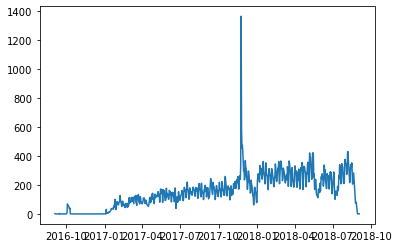

In [14]:
plt.plot(ts.time, ts.value)

In [15]:
ts = TimeSeriesData(ts)

In [16]:
ts2 = ts[200:-15]

In [17]:
# import the param and model classes for Prophet model
from kats.models.prophet import ProphetModel, ProphetParams

# create a model param instance
params = ProphetParams(seasonality_mode='multiplicative', daily_seasonality=True) # additive mode gives worse results

# create a prophet model instance
m = ProphetModel(ts2, params)

# fit model simply by calling m.fit()
m.fit()

# make prediction for next 30 month
fcst = m.predict(steps=30)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


Initial log joint probability = -3.13106
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       1250.09   1.42449e-06       77.7552     0.05874     0.05874      152   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     159       1250.43   0.000284217       130.309   3.431e-06       0.001      278  LS failed, Hessian reset 
     199       1250.66   0.000740774        65.073      0.7562      0.7562      331   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     283       1250.72   9.71204e-05       56.9409   8.763e-07       0.001      489  LS failed, Hessian reset 
     299       1250.73    1.4406e-06       60.9503           1           1      514   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     384       1251.11   0.000131019       92.9654   8.563e-07       0.001      667  LS failed, Hessian rese

In [18]:
fcst.head()

,time,fcst,fcst_lower,fcst_upper
0,2018-08-20,292.427808,198.310590,384.015208
1,2018-08-21,289.488053,197.524361,379.441717
2,2018-08-22,280.734699,187.282391,367.541195
3,2018-08-23,267.158859,174.488067,354.178942
4,2018-08-24,258.316020,165.380442,346.413560


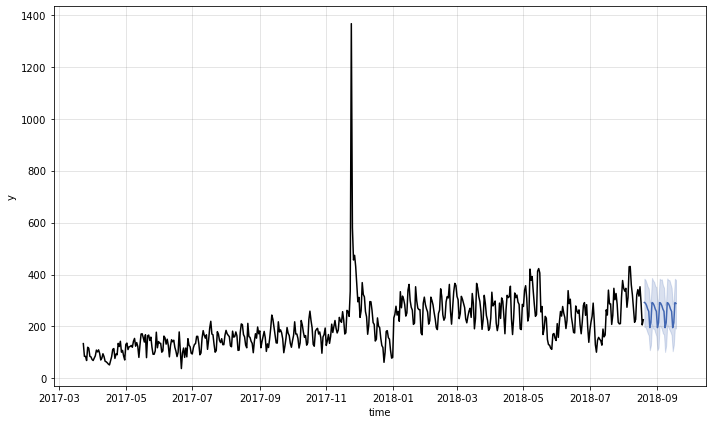

In [19]:
m.plot()

In [20]:
from kats.detectors.outlier import OutlierDetector

ts_outlierDetection = OutlierDetector(ts2, 'multiplicative') # call OutlierDetector
ts_outlierDetection.detector() # apply OutlierDetector

In [21]:
ts2[ts2.time.isin(ts_outlierDetection.outliers[0])]

,time,value
0,2017-11-22,239.0
1,2017-11-24,1366.0


In [22]:
ts2_outliers_removed = ts_outlierDetection.remover(interpolate = False) # No interpolation
ts2_outliers_interpolated = ts_outlierDetection.remover(interpolate = True) # With interpolation

In [28]:
ts2_outliers_interpolated[ts2_outliers_removed.value.isna()]

,time,y_0
0,2017-11-22,297.0
1,2017-11-24,458.0


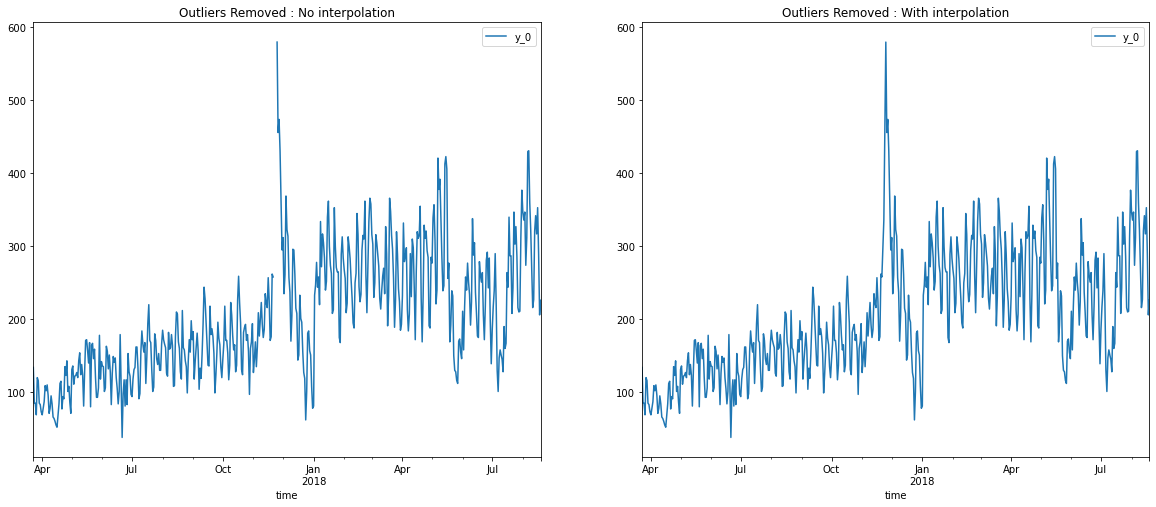

In [23]:
fig, ax = plt.subplots(figsize=(20,8), nrows=1, ncols=2)

ts2_outliers_removed.to_dataframe().plot(x = 'time',y = 'y_0', ax= ax[0])
ax[0].set_title("Outliers Removed : No interpolation")
ts2_outliers_interpolated.to_dataframe().plot(x = 'time',y = 'y_0', ax= ax[1])
ax[1].set_title("Outliers Removed : With interpolation")
plt.show()

In [61]:
ts2_outliers_removed

,time,y_0
0,2017-03-23,134.0
1,2017-03-24,85.0
2,2017-03-25,85.0
3,2017-03-26,69.0
4,2017-03-27,120.0
...,...,...
510,2018-08-15,317.0
511,2018-08-16,353.0
512,2018-08-17,289.0
513,2018-08-18,206.0


In [58]:
ts[ts.value > 500]

,time,value
0,2017-11-24,1366.0
1,2017-11-25,580.0


In [36]:
len(ts2)

515

# Prophet

In [29]:
from kats.detectors.prophet_detector import ProphetDetectorModel

In [30]:
model = ProphetDetectorModel()

In [37]:
res = model.fit(ts2[:200])

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Initial log joint probability = -4.4349
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      96        367.44   6.65752e-05       49.6219   1.022e-06       0.001      167  LS failed, Hessian reset 
      99       367.441   7.79139e-06       59.7385      0.7846      0.7846      170   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     120       367.443   4.67911e-06        55.445   7.103e-08       0.001      235  LS failed, Hessian reset 
     137       367.443   1.54384e-08        45.232      0.3356           1      261   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance


In [38]:
res

In [100]:
res = model.fit_predict(ts2[200:], ts2[:200])

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Initial log joint probability = -4.4349
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      96        367.44   6.65752e-05       49.6219   1.022e-06       0.001      167  LS failed, Hessian reset 
      99       367.441   7.79139e-06       59.7385      0.7846      0.7846      170   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     120       367.443   4.67911e-06        55.445   7.103e-08       0.001      235  LS failed, Hessian reset 
     137       367.443   1.54384e-08        45.232      0.3356           1      261   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance


In [95]:
help(res)

Help on AnomalyResponse in module kats.detectors.detector_consts object:

class AnomalyResponse(builtins.object)
 |  AnomalyResponse(scores: 'TimeSeriesData', confidence_band: 'ConfidenceBand', predicted_ts: 'TimeSeriesData', anomaly_magnitude_ts: 'TimeSeriesData', stat_sig_ts: 'TimeSeriesData')
 |  
 |  Methods defined here:
 |  
 |  __init__(self, scores: 'TimeSeriesData', confidence_band: 'ConfidenceBand', predicted_ts: 'TimeSeriesData', anomaly_magnitude_ts: 'TimeSeriesData', stat_sig_ts: 'TimeSeriesData')
 |      Initialize self.  See help(type(self)) for accurate signature.
 |  
 |  __str__(self) -> 'str'
 |      Return str(self).
 |  
 |  get_last_n(self, N: 'int') -> 'AnomalyResponse'
 |      returns the response for the last N days
 |  
 |  inplace_update(self, time: 'datetime', score: 'Union[float, ArrayLike]', ci_upper: 'Union[float, ArrayLike]', ci_lower: 'Union[float, ArrayLike]', pred: 'Union[float, ArrayLike]', anom_mag: 'Union[float, ArrayLike]', stat_sig: 'Union[float,

In [101]:
t = ts2[200:].to_dataframe()

In [102]:
t["anomaly"] = res.scores.value

In [103]:
res.confidence_band

ConfidenceBand(lower=          time  yhat_lower
0   2017-10-09  164.505435
1   2017-10-10  173.221243
2   2017-10-11  152.229274
3   2017-10-12  142.169319
4   2017-10-13  146.240961
..         ...         ...
310 2018-08-15  265.014025
311 2018-08-16  277.175286
312 2018-08-17  256.824579
313 2018-08-18  228.466818
314 2018-08-19  240.385124

[315 rows x 2 columns], upper=          time  yhat_upper
0   2017-10-09  215.934120
1   2017-10-10  222.965805
2   2017-10-11  212.132887
3   2017-10-12  206.287935
4   2017-10-13  206.062274
..         ...         ...
310 2018-08-15  324.771649
311 2018-08-16  321.743361
312 2018-08-17  322.902269
313 2018-08-18  286.193802
314 2018-08-19  309.201553

[315 rows x 2 columns])

In [104]:
t["lower"] = res.confidence_band.lower.to_dataframe().yhat_lower

In [105]:
t["upper"] = res.confidence_band.upper.to_dataframe().yhat_upper

<AxesSubplot:xlabel='time', ylabel='value'>

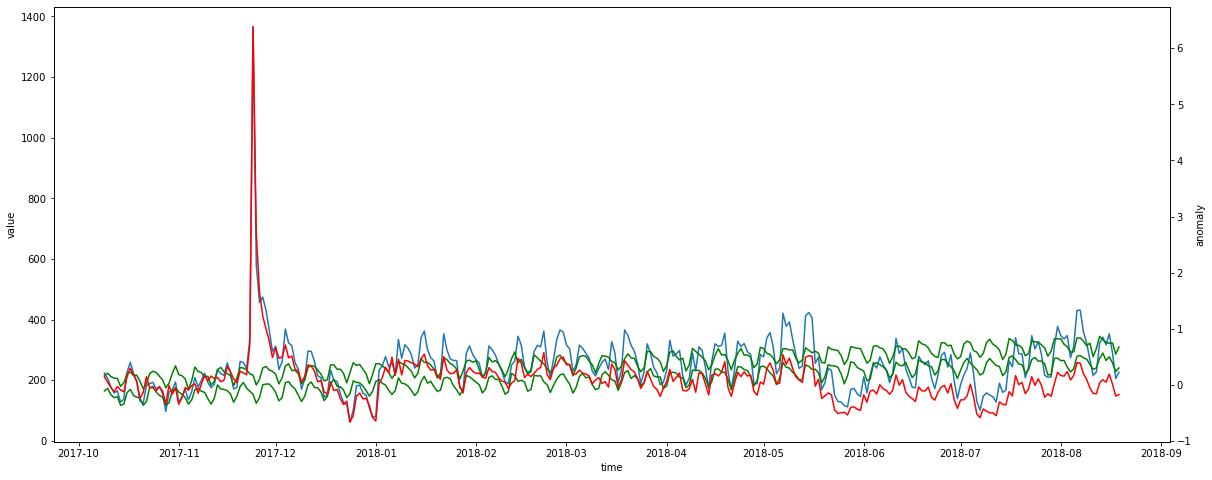

In [106]:
fig, ax = plt.subplots(figsize=(20,8), )

sns.lineplot(data=t, x="time", y="value", ax=ax)

ax2 = ax.twinx()

sns.lineplot(data=t, x="time", y="anomaly", ax=ax2, color="red")

sns.lineplot(data=t, x="time", y="upper", ax=ax, color="green")

sns.lineplot(data=t, x="time", y="lower", ax=ax, color="green")

In [88]:
ts

,time,value
0,2016-09-04,2.0
1,2016-09-05,1.0
2,2016-09-06,0.0
3,2016-09-07,0.0
4,2016-09-08,0.0
...,...,...
725,2018-08-30,0.0
726,2018-08-31,0.0
727,2018-09-01,0.0
728,2018-09-02,0.0


<AxesSubplot:xlabel='time', ylabel='value'>

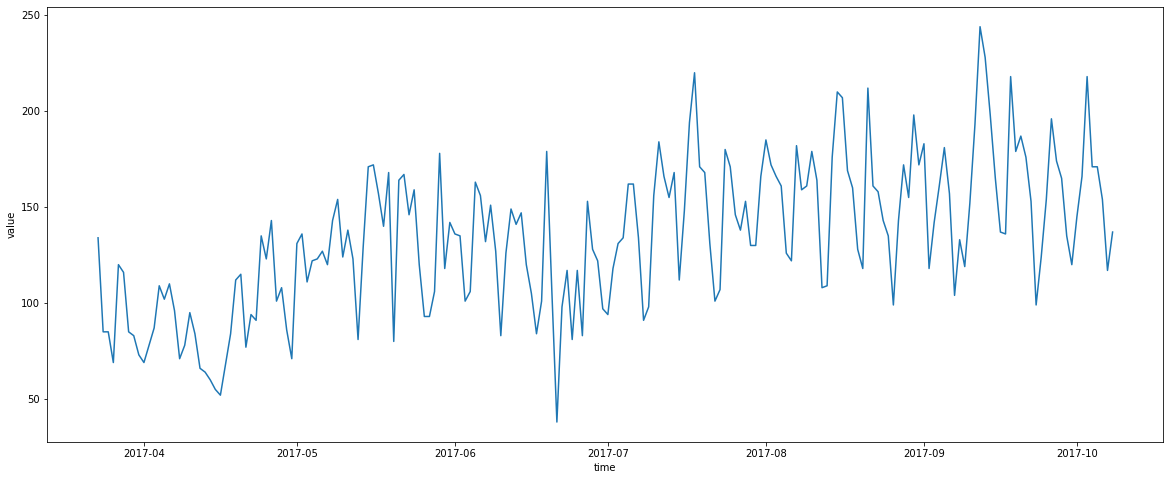

In [93]:
fig, ax = plt.subplots(figsize=(20,8), )

sns.lineplot(data=ts2[:200].to_dataframe(), x="time", y="value", ax=ax)

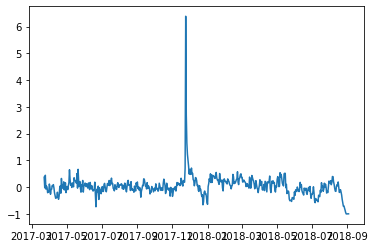

In [49]:
plt.plot(res.scores.time, res.scores.value)

In [46]:
res.scores

,time,value
0,2017-03-23,0.370503
1,2017-03-24,-0.026554
2,2017-03-25,0.444868
3,2017-03-26,-0.071417
4,2017-03-27,0.040908
...,...,...
525,2018-08-30,-1.000000
526,2018-08-31,-1.000000
527,2018-09-01,-1.000000
528,2018-09-02,-1.000000
